In [26]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt

In [27]:
import os, sys
sys.path.append('../functions')

from hough import HoughLinear

# Synthetic data

In [28]:
X1 = numpy.array(numpy.arange(0, 10, 1)).reshape((-1, 1))
y1 = 1. + 1. * X1.reshape(-1) + 1.*numpy.random.rand(len(X1))

X2 = numpy.array(numpy.arange(0, 10, 1)).reshape((-1, 1))
y2 = -4.5 + 3. * X2.reshape(-1) + 1.*numpy.random.rand(len(X2))

X3 = numpy.array(numpy.arange(0, 10, 1)).reshape((-1, 1))
y3 = 4.5 + -1. * X2.reshape(-1) + 1.*numpy.random.rand(len(X2))

X = numpy.concatenate((X1, X2, X3), axis=0) 
y = numpy.concatenate((y1, y2, y3), axis=0) 

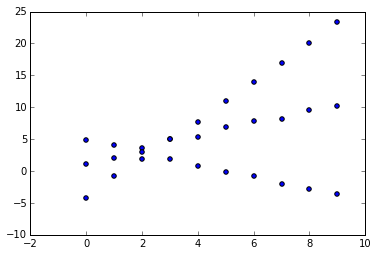

In [29]:
plt.scatter(X, y)
plt.show()

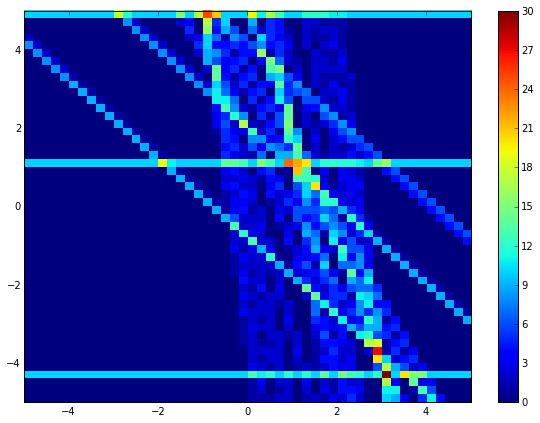

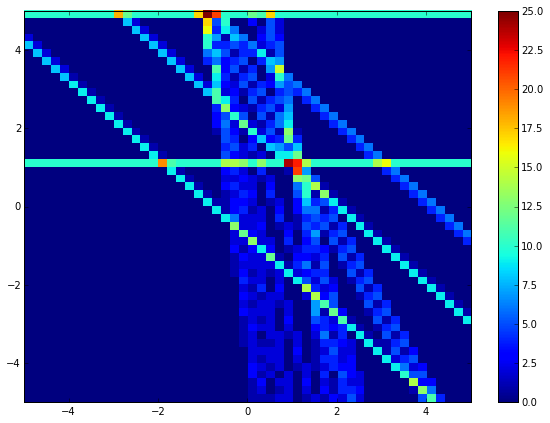

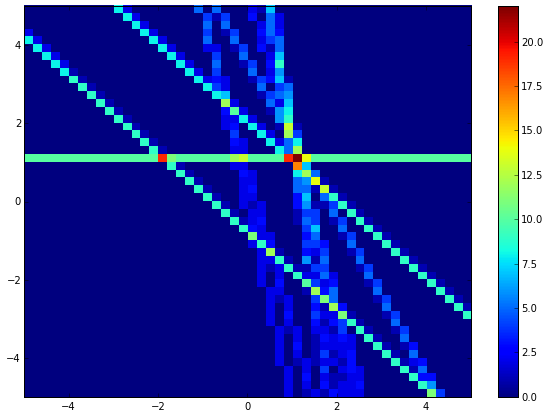

In [30]:
n=3
hl = HoughLinear(k_params=(-5, 5, 50), b_params=(-5, 5, 50), n_candidates=n, show=True)
labels, candidates = hl.fit(X, y, weights_mul=None)

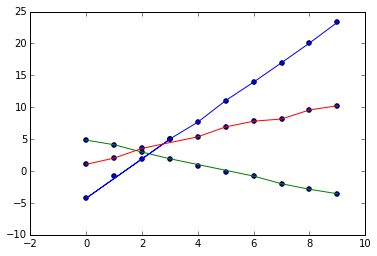

In [31]:
for i in range(1, n+1):
    plt.plot(X[labels==i], y[labels==i])

plt.scatter(X, y)
plt.show()

# Ship data

In [32]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


In [33]:
from Y_views import *
event_id = 1756#27
event = all_hits[all_hits['event'] == event_id]

%time event = modify_for_yz_analysis_1_2(event)

CPU times: user 1.89 s, sys: 68.8 ms, total: 1.96 s
Wall time: 1.93 s


In [34]:
%%time
XX = event.Wz.values
yy = event.Wy.values
rr = 1*event.dist2Wire.values

X = numpy.concatenate((XX, XX), axis=0) 
y = numpy.concatenate((yy+rr, yy-rr), axis=0) 

CPU times: user 276 µs, sys: 51 µs, total: 327 µs
Wall time: 286 µs


In [35]:
%%time
n=2
hl = HoughLinear(k_params=(-0.2, 0.2, 15000), b_params=(-600, 600, 10000), n_candidates=n, show=False)
labels, candidates = hl.fit(X, y, weights_mul=5.)

CPU times: user 17.6 s, sys: 7.16 s, total: 24.8 s
Wall time: 25.9 s


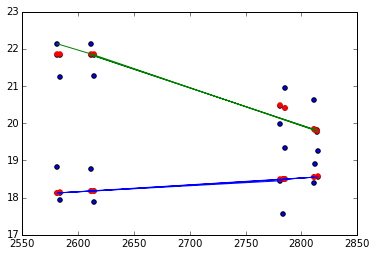

In [36]:
for i in candidates:
    plt.plot(X[i], y[i])

plt.scatter(X, y)
plt.scatter(event.Z.values, event.Y.values, linewidth=1, color='r')
#plt.ylim(-160, -140)
#plt.ylim(25, 30)
plt.show()